In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df=pd.read_csv('C:/Users/USER/Downloads/names/yob1880.txt',names=['name','sex','birth'])

In [15]:
df.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [16]:
df.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

In [17]:
years=range(1880,2019)
arr=[]
columns=['name','sex','birth']
for year in years:
    path='C:/Users/USER/Downloads/names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    arr.append(frame)

name=pd.concat(arr,ignore_index=True)
name

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957927,Zylas,M,5,2018
1957928,Zyran,M,5,2018
1957929,Zyrie,M,5,2018
1957930,Zyron,M,5,2018


In [18]:
total_birth=name.pivot_table('birth',index='year',columns='sex',aggfunc=sum)

In [19]:
total_birth.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442


<AxesSubplot:title={'center':'Total Birth by sex and year'}, xlabel='year'>

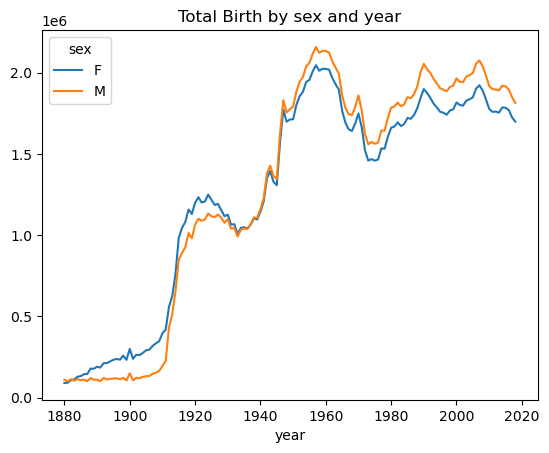

In [20]:
total_birth.plot(title='Total Birth by sex and year')

In [21]:
def add_pname(popular_name):
    popular_name['popular_name']=((popular_name.birth/popular_name.birth.sum())*100)
    return popular_name

name=name.groupby(['year','sex']).apply(add_pname)
name

,name,sex,birth,year,popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
1957927,Zylas,M,5,2018,0.000276
1957928,Zyran,M,5,2018,0.000276
1957929,Zyrie,M,5,2018,0.000276
1957930,Zyron,M,5,2018,0.000276


In [22]:
def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [23]:
boy_name = top_100[top_100.sex == 'M']
girl_name = top_100[top_100.sex == 'F']
total_birth = top_100.pivot_table('birth', index = 'year', columns = 'name', aggfunc = sum)

In [24]:
boy_name.head()

,name,sex,birth,year,popular_name
35133,Ab,M,5,1880,0.004525
35134,Geordie,M,5,2000,0.000255
35135,Gedalya,M,5,2000,0.000255
35136,Geary,M,5,2000,0.000255
35137,Gator,M,5,2000,0.000255


In [25]:
girl_name.head()

,name,sex,birth,year,popular_name
0,Adelle,F,5,1880,0.005495
1,Tyshe,F,5,1998,0.000283
2,Tynise,F,5,1998,0.000283
3,Tyonia,F,5,1998,0.000283
4,Tyreese,F,5,1998,0.000283
